In [2]:
import scipy.stats as stats
from scipy.special import comb,perm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 이산확률분포

### 베르누이 시행

결과가 두 가지 중 하나로만 나오는 실험이나 시행을 **베르누이 시행**(Bernoulli trial)이라고 한다. 예를 들어 동전을 한 번 던져 앞면(H:Head)이 나오거나 뒷면(T:Tail)이 나오게 하는 것도 베르누이 시행이다.

### 베르누이 확률변수

베르누이 시행의 결과를 실수 0 또는 1로 바꾼 것을 **베르누이 확률변수(Bernoulli random variable)**라고 한다. 베르누이 확률변수는 두 값 중 하나만 가질 수 있으므로 이산확률변수(discrete random variable)다. 

### 베르누이 확률분포

베르누이 확률변수의 분포를 베르누이 확률분포 혹은 베르누이분포라고 한다. 만약 어떤 확률변수 $X$가 베르누이분포에 의해 발생된다면 **’확률변수 $X$가 베르누이분포를 따른다’**라고 말하고 다음과 같이 수식으로 쓴다.

$$
\begin{align}
X \sim \text{Bern}(x;p)
\tag{1}
\end{align}
$$

베르누이분포의 확률질량함수 수식은 다음과 같다.

$$
\begin{align}
\text{Bern}(x;p) = 
\begin{cases} 
p   & \text{if }x=1, \\
1-p & \text{if }x=0
\end{cases}
\tag{2}
\end{align}
$$



#### 베르누이

p=0.6 으로 설정했다. 이러한 확률변수를 만든 것은 앞면이 나올 확률이 0.6인 동전을 만든 것과 같다.

1. 숫자 1부터 10까지 적혀있는 카드가 10장 있다. 그럼 이 중에서 하나의 카드를 뽑았을 때, 8이 적힌 카드가 나올 확률을 구하시오.

카드를 뽑았을 때 8이 적힌 카드가 나오면 성공이고, 숫자 1, 2, 3, 4, 5, 6, 7, 9, 10 이 적힌 카드가 나오면 실패다. 그래서 성공확률은 1/10이고 실패확률은 9/10이기에, 공식을 사용해서 확률을 구해보면 0.1 or 10%가 나온다.

베르누이분포의 모멘트는 다음과 같다.

* 기댓값

$$
\begin{align}
\text{E}[X]  = \mu
\tag{1}
\end{align}
$$

(증명)

$$
\begin{align}
\begin{aligned}
\text{E}[X] 
&= \sum_{x_i \in \Omega} x_i p(x_i) \\
&= 1 \cdot \mu + 0 \cdot (1 - \mu) \\
&= \mu
\end{aligned}
\tag{2}
\end{align}
$$

==============================================================================
* 분산

$$
\begin{align}
\text{Var}[X] = \mu(1-\mu)
\tag{3}
\end{align}
$$

(증명)

$$
\begin{align}
\begin{aligned}
\text{Var}[X] 
&= \sum_{x_i \in \Omega} (x_i - \mu)^2 p(x_i) \\
&= (1 - \mu)^2 \cdot \mu + (0 - \mu)^2 \cdot (1 - \mu) \\
&= \mu(1-\mu)
\end{aligned}
\tag{4}
\end{align}
$$

In [3]:
#숫자 1부터 10까지 적혀있는 카드가 10장 있다. 
#그럼 이 중에서 하나의 카드를 뽑았을 때, 8이 적힌 카드가 나올 확률을 구하시오.
mu = 1/10  
rv = stats.bernoulli( mu )
xx = [1,0]
rv.pmf( xx )

array([0.1, 0.9])

In [4]:
rv.mean()

0.1

In [5]:
rv.var() # 0.1*(1-0.1)

0.09000000000000001

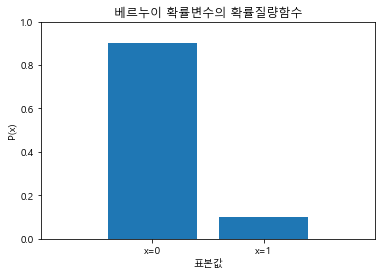

In [6]:
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

In [7]:
#주사위를 1개던져서 3이 나올 확률을 구하시요..
mu = 1/6
rv = stats.bernoulli( mu )
xx = [1,0]
rv.pmf( xx )

array([0.16666667, 0.83333333])

In [8]:
##주사위 2개를 던졌을때 눈금의 합이 6이 나올 확률을 구하시요.
(1,5), (2,4), (3,3), (4,2), (5,1)

((1, 5), (2, 4), (3, 3), (4, 2), (5, 1))

In [9]:
mu = 5/36 
rv = stats.bernoulli(mu)
xx = [1, 0]
rv.pmf(xx)

array([0.13888889, 0.86111111])

In [10]:
rv.mean()

0.1388888888888889

In [11]:
rv.var()

0.11959876543209878

1000 개의 사탕이 들어있는 바구니가 
있다.( 갈색, 파랑, 보라) <br>
한 주먹을 쥐어서 사탕을 뽑았더니 100개였고 갈색 사탕비율이 36%가 나왔다. <br>
갈색사탕이 몇%정도 들어있는지 
신뢰구간 95%로 추정하시요.
( 실제 갈색사탕의비율 40.3%)

In [22]:
p = 0.36
n = 100
print(p + 1.96 * np.sqrt((p*(1-p))/n))
print('36%에서 신뢰구간 {}% '.format((0.45408 - p)*100))
print(p - 1.96 * np.sqrt((p*(1-p))/n))

0.45408
36%에서 신뢰구간 9.408% 
0.26592


In [ ]:
'''
1000 개의 사탕이 들어있는 바구니가 있다.( 갈색, 파랑, 보라)
갈색사탕이 몇 %정도 들어있는지 50개의 표본을 임의로 추출 후 확인해 보았더니
20개 (갈색), 17(파랑), 13(보라) 있었다.
갈색사탕이 몇%정도 들어있는지 신뢰구간 99%로 추정하시요. ( 실제 갈색사탕의비율 40.3%)
'''

In [26]:
p = 20/50
n = 50

a = p + 2.58 * np.sqrt(p*(1-p)/n)
b = p - 2.58 * np.sqrt(p*(1-p)/n)
print(f'{b} <= 신뢰구간 <= {a}')
print(f'{p*100}% +- {(a-p)*100}% 포인트')


0.22125235665889187 <= 신뢰구간 <= 0.5787476433411082
40.0% +- 17.874764334110814% 포인트


## 이항분포


베르누이분포를 따르는 확률변수 $Y$의 확률질량함수를 대입하여 정리하면 이항분포 확률변수 $X$의 확률질량함수는 다음과 같아진다.

$$
\begin{align}
\text{Bin}(x;N,p) = \binom N x \; p^x(1-p)^{N-x}
\tag{1}
\end{align}
$$

이 식에서 $\binom N x$ 기호는 **조합(combination)**이라는 기호로 $N$개 원소 중에 $x$개 원소를 순서와 상관없이 선택할 수 있는 경우의 수를 뜻한다. 조합은 다음 공식으로 계산할 수 있다.

$$
\begin{align}
\binom N x =\dfrac{N!}{x!(N-x)!}
\tag{2}
\end{align}
$$

$!$ 기호는 **팩토리얼(factorial)**이라고 하며 다음처럼 정의한다.

$$
\begin{align}
N! = N\cdot (N-1) \cdots 2 \cdot 1
\tag{3}
\end{align}
$$

이항분포는 이산확률분포에서 가장 많이 사용하는 분포로, 이전 글에서 알아보았던 베르누이분포의 업그레이드 버전이다. 먼저 베르누이분포가 “성공”과 “실패” 이렇게 2가지의 상황만 나오는 실험에서 사용한다고 했었는데,(참고) 이항분포도 마찬가지다. 그래서 베르누이분포와 똑같이 성공확률은 p이고, 실패확률은 1-p이다.